In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [11]:
df = pd.read_csv("marketing_campaign.csv")
data = df.copy()

In [12]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [13]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")
data["Age"] = 2025 - data["Year_Birth"]

In [14]:
spend_cols = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts",
              "MntSweetProducts","MntGoldProds"]
data["TotalSpend"] = data[spend_cols].sum(axis=1)

In [15]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

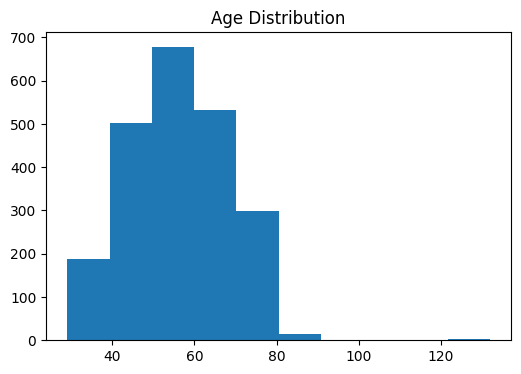

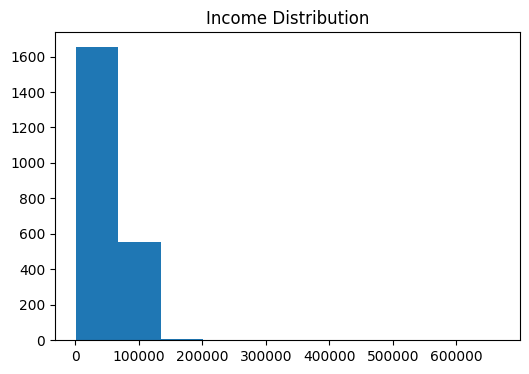

In [17]:
plt.figure(figsize=(6,4))
plt.hist(data["Age"]); plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(data["Income"]); plt.title("Income Distribution")
plt.show()

In [19]:
features = ["Income", "Recency", "TotalSpend"]
X = data[features]


In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

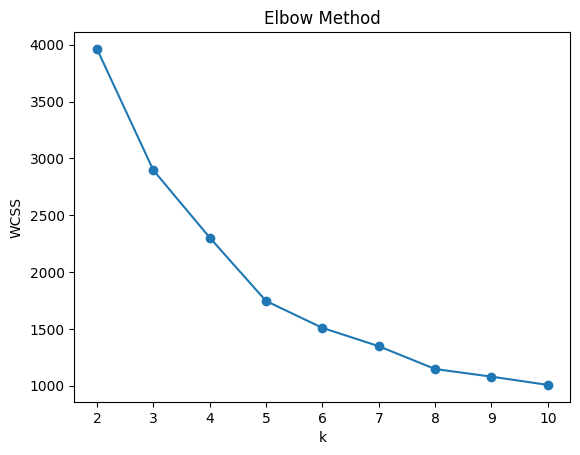

In [24]:
wcss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.show()

In [25]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
data["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

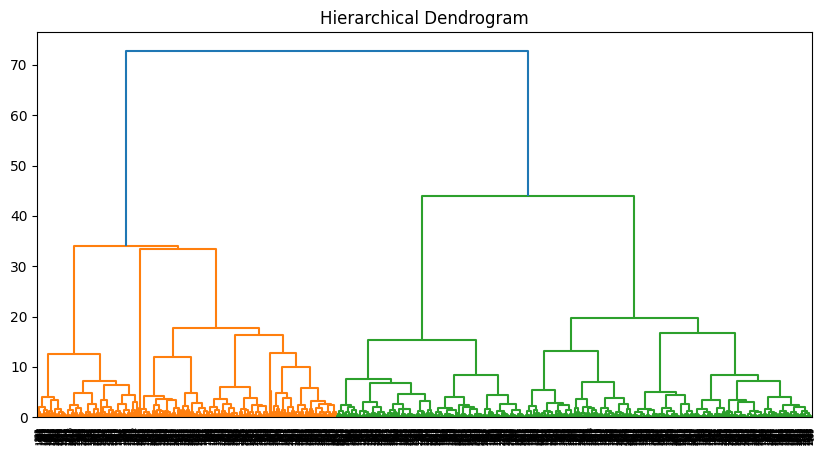

In [26]:
plt.figure(figsize=(10,5))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title("Hierarchical Dendrogram")
plt.show()

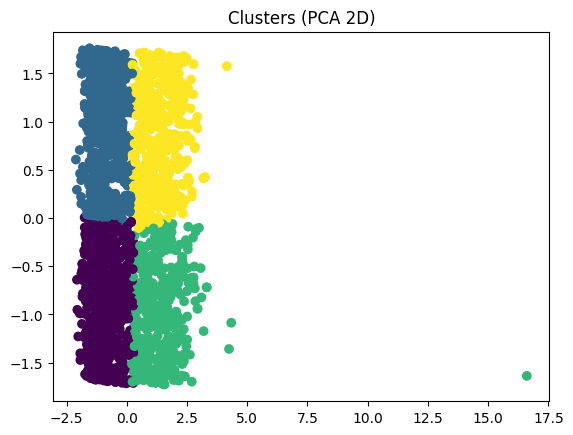

In [29]:
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X_scaled)

plt.scatter(pca_2d[:,0], pca_2d[:,1], 
            c=data["KMeans_Cluster"], cmap="viridis")
plt.title("Clusters (PCA 2D)")
plt.show()

In [30]:
profile = data.groupby("KMeans_Cluster")[["Age","Income","TotalSpend","Recency"]].mean()
print(profile)

                      Age        Income   TotalSpend    Recency
KMeans_Cluster                                                 
0               54.518741  38293.316342   191.373313  23.550225
1               55.474551  38230.672156   178.624251  73.594311
2               57.400990  75256.321782  1257.232673  22.475248
3               58.454927  71900.679245  1237.714885  72.668763
